In [ ]:

import pandas as pd


url = "https://raw.githubusercontent.com/PacktPublishing/Hands-on-Exploratory-Data-Analysis-with-Python/refs/heads/master/Chapter%204/sales.csv"
df_sales = pd.read_csv(url)

print("✅ Dataset loaded successfully.\n")
display(df_sales.head())
print("\n Basic Info:")
df_sales.info()


✅ Dataset loaded successfully.



,Account,Company,Order,SKU,Country,Year,Quantity,UnitPrice,transactionComplete
0,123456779,Kulas Inc,99985,s9-supercomputer,Aruba,1981,5148,545,False
1,123456784,GitHub,99986,s4-supercomputer,Brazil,2001,3262,383,False
2,123456782,Kulas Inc,99990,s10-supercomputer,Montserrat,1973,9119,407,True
3,123456783,My SQ Man,99999,s1-supercomputer,El Salvador,2015,3097,615,False
4,123456787,ABC Dogma,99996,s6-supercomputer,Poland,1970,3356,91,True



 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Account              10000 non-null  int64 
 1   Company              10000 non-null  object
 2   Order                10000 non-null  int64 
 3   SKU                  10000 non-null  object
 4   Country              10000 non-null  object
 5   Year                 10000 non-null  int64 
 6   Quantity             10000 non-null  int64 
 7   UnitPrice            10000 non-null  int64 
 8   transactionComplete  10000 non-null  bool  
dtypes: bool(1), int64(5), object(3)
memory usage: 634.9+ KB



### 🔹 Step 1: Data Acquisition and Initial Review

**Technical Analysis:**

* The dataset contains **10,000 records** and **9 columns**, which provides a sufficient sample size for meaningful statistical analysis.
* The columns include various data types: numeric (`int64`), categorical (`object`), and boolean (`bool`), which indicates a well-structured and diverse dataset.
* There are **no missing values**, as all columns show a `Non-Null Count` equal to the total number of rows (10,000).
* This confirms that the dataset is **complete, clean, and ready** for further preprocessing.

**Conclusion:**
The dataset has been properly imported and inspected. No structural or missing data issues were found. This initial review confirms that the data is reliable for the next steps, such as feature engineering and outlier detection.


In [ ]:

df_sales['TotalPrice'] = df_sales['Quantity'] * df_sales['UnitPrice']

print("✅ New column 'TotalPrice' created successfully.")
display(df_sales[['Quantity', 'UnitPrice', 'TotalPrice']].head())


✅ New column 'TotalPrice' created successfully.


,Quantity,UnitPrice,TotalPrice
0,5148,545,2805660
1,3262,383,1249346
2,9119,407,3711433
3,3097,615,1904655
4,3356,91,305396



### 🔹 Step 2: Feature Engineering – Creating the “TotalPrice” Variable

In this step, a new feature named **`TotalPrice`** was generated by multiplying the `Quantity` and `UnitPrice` columns for each transaction. This operation helps measure the **total value of each sale**, which is an essential metric for sales performance analysis.

**Technical Analysis:**

* The formula used was:
  [
  TotalPrice = Quantity * UnitPrice
  ]
* The successful execution message confirmed the new column creation.
* Reviewing the first few rows shows that the computed `TotalPrice` values make sense.
  For example, for the first record:
  (5148 * 545 = 2,805,660), which matches the displayed result.
* This demonstrates that the calculation was applied accurately across all records.

**Importance of this Step:**
Feature engineering like this transforms raw data into **more meaningful variables**, enabling deeper insights and more accurate analysis.
In this case, `TotalPrice` will later serve as a **key metric** for identifying outliers and may also function as a **dependent variable** in predictive modeling.

**Conclusion:**
The creation of the `TotalPrice` feature was executed successfully and verified through sample checks.
This new variable enhances the dataset’s analytical potential and will play a central role in subsequent data cleaning and statistical analysis steps.



In [ ]:
outlier_threshold = 3_000_000
outliers = df_sales[df_sales['TotalPrice'] > outlier_threshold]
outlier_count = outliers.shape[0]

print(f"⚠️ Outliers found (TotalPrice > {outlier_threshold}): {outlier_count}")


df_cleaned_outliers = df_sales[df_sales['TotalPrice'] <= outlier_threshold].copy()
removed_rows = df_sales.shape[0] - df_cleaned_outliers.shape[0]

print(f"✅ Rows removed due to outliers: {removed_rows}")
print(f"🧾 Cleaned DataFrame shape: {df_cleaned_outliers.shape}")


⚠️ Outliers found (TotalPrice > 3000000): 2094
✅ Rows removed due to outliers: 2094
🧾 Cleaned DataFrame shape: (7906, 10)


### 🔹 Step 3: Outlier Detection and Filtering


**Technical Analysis:**

* Using boolean indexing, **2,094 transactions** were detected where `TotalPrice > 3,000,000`.
* These records were removed to create a cleaned dataset, resulting in a new DataFrame named `df_cleaned_outliers` containing **7,906 rows** instead of 10,000.
* The operation ensured that the remaining data represent realistic transaction values without the influence of extreme anomalies.

**Rationale:**
Outliers often arise due to **data entry errors**, **rare events**, or **special cases** that do not reflect normal business operations.
If not handled properly, these values can **bias statistical measures** such as the mean and standard deviation, or even mislead machine learning models.

**Conclusion:**
By identifying and filtering out extreme `TotalPrice` values, the dataset was refined and stabilized for reliable analysis.
This step enhances the **accuracy and robustness** of any future statistical or predictive modeling processes applied to this dataset.

In [ ]:

# إزالة التكرار
duplicate_count = df_cleaned_outliers.duplicated().sum()
print(f"🧩 Duplicated rows: {duplicate_count}")

df_no_duplicates = df_cleaned_outliers.drop_duplicates(keep='last')
print(f"✅ Rows after removing duplicates: {df_no_duplicates.shape[0]}")

# فحص القيم المفقودة
print("\n📋 Missing values per column:")
display(df_no_duplicates.isna().sum())

# حذف الصفوف التي تحتوي على أي قيم مفقودة
df_dropna = df_no_duplicates.dropna()
rows_lost = df_no_duplicates.shape[0] - df_dropna.shape[0]
print(f"Rows lost after dropna(): {rows_lost}")

# ✅ ملء القيم المفقودة في الأعمدة الموجودة فقط
for col in df_no_duplicates.columns:
    if df_no_duplicates[col].dtype == 'object':
        df_no_duplicates[col] = df_no_duplicates[col].fillna('Unknown')

print("✅ Missing values handled safely.")


🧩 Duplicated rows: 0
✅ Rows after removing duplicates: 7906

📋 Missing values per column:


,0
Account,0
Company,0
Order,0
SKU,0
Country,0
Year,0
Quantity,0
UnitPrice,0
transactionComplete,0
TotalPrice,0


Rows lost after dropna(): 0
✅ Missing values handled safely.



### 🔹 Step 4: Data Deduplication and Missing Value Handling

This step focused on ensuring the **quality and reliability** of the dataset by removing duplicate records and addressing any potential missing data issues.

**Technical Analysis:**

* The `.duplicated()` function revealed **0 duplicated rows**, meaning there were no repeated records in the dataset.
  This confirms that each transaction entry is unique.
* The dataset after duplicate removal retained **7,906 rows**, matching the previous cleaned dataset size — showing that no data was lost during deduplication.
* A check for missing values (`isna().sum()`) across all columns showed **no missing data**, with a total count of zero for every feature.
* Nevertheless, a safety step was implemented to handle any future null values:

  * For categorical (object-type) columns, missing values were filled with the placeholder `"Unknown"`.
  * This ensures data consistency without affecting the integrity of the analysis.

**Rationale:**
Removing duplicates prevents **artificial inflation of counts** and guarantees that statistical summaries are accurate.
Handling missing data — even when not initially present — reflects good data hygiene practices and prepares the dataset for modeling or future updates.

**Conclusion:**
After this step, the dataset is confirmed to be **clean, consistent, and reliable**, with no duplication or missing-value issues detected.
This significantly enhances the **trustworthiness** of the variables for any subsequent statistical or predictive analysis.



In [ ]:

labels = ['Low Quantity', 'Medium Quantity', 'High Quantity']
df_no_duplicates['Quantity_Bin'] = pd.cut(df_no_duplicates['Quantity'], bins=3, labels=labels)

print("📊 Quantity_Bin distribution:")
display(df_no_duplicates['Quantity_Bin'].value_counts())


📊 Quantity_Bin distribution:


,count
Quantity_Bin,
Low Quantity,3355
Medium Quantity,2850
High Quantity,1701



### 🔹 Step 5: Discretization and Binning of the “Quantity” Variable

In this step, the continuous numerical variable `Quantity` was transformed into an **ordinal categorical variable** called `Quantity_Bin`.
This process, known as **discretization (or binning)**, groups numerical values into defined intervals to simplify analysis and reveal distribution patterns.

**Technical Analysis:**

* The `pd.cut()` function was used to divide the `Quantity` variable into **three equal-width intervals**, labeled as:

  * *Low Quantity*
  * *Medium Quantity*
  * *High Quantity*
* The distribution of transactions across these categories was:

  * **Low Quantity:** 3,355
  * **Medium Quantity:** 2,850
  * **High Quantity:** 1,701
* The results show that most transactions fall under the *Low Quantity* range, indicating that smaller order sizes are more frequent in the dataset.

**Rationale:**
Binning helps in **simplifying continuous data** for better visualization and interpretation, especially in exploratory or descriptive analysis.
It also prepares the dataset for techniques that require categorical input, such as certain types of classification or segmentation analyses.

**Conclusion:**
The discretization process was applied successfully, creating a meaningful ordinal variable (`Quantity_Bin`) that captures the distribution of order sizes.
This new feature will be useful for exploring relationships between purchase volume and other business metrics.




In [ ]:

classification = {
    'UnitPrice': ['Quantitative', 'Continuous'],
    'Quantity': ['Quantitative', 'Discrete'],
    'Description': ['Categorical', 'Nominal'],
    'Country': ['Categorical', 'Nominal'],
    'TotalPrice': ['Quantitative', 'Continuous'],
    'Quantity_Bin': ['Categorical', 'Ordinal']
}
df_class = pd.DataFrame(classification, index=['Statistical Type', 'Sub-Type']).T

print("🧠 Variable Classification Table:")
display(df_class)


🧠 Variable Classification Table:


,Statistical Type,Sub-Type
UnitPrice,Quantitative,Continuous
Quantity,Quantitative,Discrete
Description,Categorical,Nominal
Country,Categorical,Nominal
TotalPrice,Quantitative,Continuous
Quantity_Bin,Categorical,Ordinal




### 🔹 Step 6: Variable Classification

In this step, each variable in the dataset was systematically classified based on its **statistical type** and **sub-type**.
This classification helps clarify the role and analytical treatment of each feature, ensuring appropriate use of statistical and visualization techniques later in the analysis.

**Technical Analysis:**

* The classification was organized in a dictionary and converted into a DataFrame (`df_class`) for clear visualization.
* The final table includes the following variables and their respective types:

| Variable     | Statistical Type | Sub-Type   |
| ------------ | ---------------- | ---------- |
| UnitPrice    | Quantitative     | Continuous |
| Quantity     | Quantitative     | Discrete   |
| Description  | Categorical      | Nominal    |
| Country      | Categorical      | Nominal    |
| TotalPrice   | Quantitative     | Continuous |
| Quantity_Bin | Categorical      | Ordinal    |

**Interpretation:**

* **Quantitative variables** represent measurable numeric values.

  * *Continuous variables* (e.g., `UnitPrice`, `TotalPrice`) can take any decimal value within a range.
  * *Discrete variables* (e.g., `Quantity`) take only integer values.
* **Categorical variables** describe group membership rather than numerical magnitude.

  * *Nominal variables* (e.g., `Country`, `Description`) have no inherent order.
  * *Ordinal variables* (e.g., `Quantity_Bin`) follow a logical ranking from low to high.

**Conclusion:**
This classification provides a clear statistical framework for understanding each variable’s characteristics.
It ensures that future analyses — such as visualization, correlation, or modeling — apply the correct **statistical methods** for each data type.



In [ ]:

# المتغير التابع والمستقل
outcome = "TotalPrice"
explanatory = ["Quantity", "UnitPrice", "Country"]
print(f"🎯 Outcome Variable: {outcome}")
print(f"📈 Explanatory Variables: {explanatory}")

# إنشاء متغيرات وهمية للبلدان
df_country_dummies = pd.get_dummies(df_no_duplicates['Country'], prefix='Country')

print("\n💡 Dummy Variables (Head):")
display(df_country_dummies.head())
print("ℹ️ '1' indicates that the transaction occurred in that specific country.")


🎯 Outcome Variable: TotalPrice
📈 Explanatory Variables: ['Quantity', 'UnitPrice', 'Country']

💡 Dummy Variables (Head):


,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antarctica (the territory South of 60 deg S),Country_Antigua and Barbuda,Country_Argentina,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


ℹ️ '1' indicates that the transaction occurred in that specific country.




### 🔹 Step 7: Defining Dependent and Independent Variables

In this step, the analysis defines the **dependent (outcome)** and **independent (explanatory)** variables that will be used for modeling or further statistical study.

**Details:**

* The dependent variable (**Outcome**) is:
  **`TotalPrice`**, representing the total transaction value.
* The independent (explanatory) variables are:
  **`Quantity`**, **`UnitPrice`**, and **`Country`**, as these are expected to influence the total price of each transaction.

**Technical Implementation:**

```python
outcome = "TotalPrice"
explanatory = ["Quantity", "UnitPrice", "Country"]
```

The variables were printed to confirm their selection.

Next, since **Country** is a **categorical variable**, it was transformed into **dummy variables** using `pd.get_dummies()`.
This process converts each unique country into a separate binary column (0 or 1), enabling its inclusion in mathematical models that require numerical inputs.

**Dummy Variable Encoding Example:**

* Each column (e.g., `Country_France`, `Country_India`, `Country_Brazil`, etc.) takes a value of:

  * `1` → if the transaction occurred in that specific country.
  * `0` → otherwise.

**Output Summary:**

* The dummy variable dataset (`df_country_dummies`) contains **243 columns**, representing all countries in the dataset.
* This encoding step is essential for preparing the data for regression or machine learning models.

**Conclusion:**
The dataset is now structured for advanced analysis.
The target variable (`TotalPrice`) is clearly defined, and categorical data have been transformed into a numerical form suitable for predictive modeling.



In [ ]:


print("🔍 Conclusion:")
print(
    "Data cleaning ensures variable reliability. "
    "By removing duplicates and handling missing or extreme values, "
    "we guarantee that every observation reflects true and consistent information. "
    "This reliability is essential for valid statistical analysis and trustworthy results."
)


🔍 Conclusion:
Data cleaning ensures variable reliability. By removing duplicates and handling missing or extreme values, we guarantee that every observation reflects true and consistent information. This reliability is essential for valid statistical analysis and trustworthy results.




### 🔹 Step 9: Final Summary — Data Cleaning Conclusion

**Code Output:**

```
🔍 Conclusion:
Data cleaning ensures variable reliability. By removing duplicates and handling missing or extreme values, we guarantee that every observation reflects true and consistent information. This reliability is essential for valid statistical analysis and trustworthy results.
```

**Explanation:**
This printed conclusion succinctly summarizes the entire data-cleaning process. It emphasizes the importance of data integrity as the foundation for any valid analytical work.
Through the performed steps — including **outlier removal**, **duplicate elimination**, and **handling missing values** — the dataset was transformed into a **reliable and consistent structure** suitable for further statistical modeling or machine learning.

**Interpretation:**
By ensuring that every record accurately represents real-world behavior, the analysis minimizes the risk of biased results or misleading interpretations.
This step confirms that the dataset is now statistically **sound, balanced, and ready for exploration and predictive analysis**.



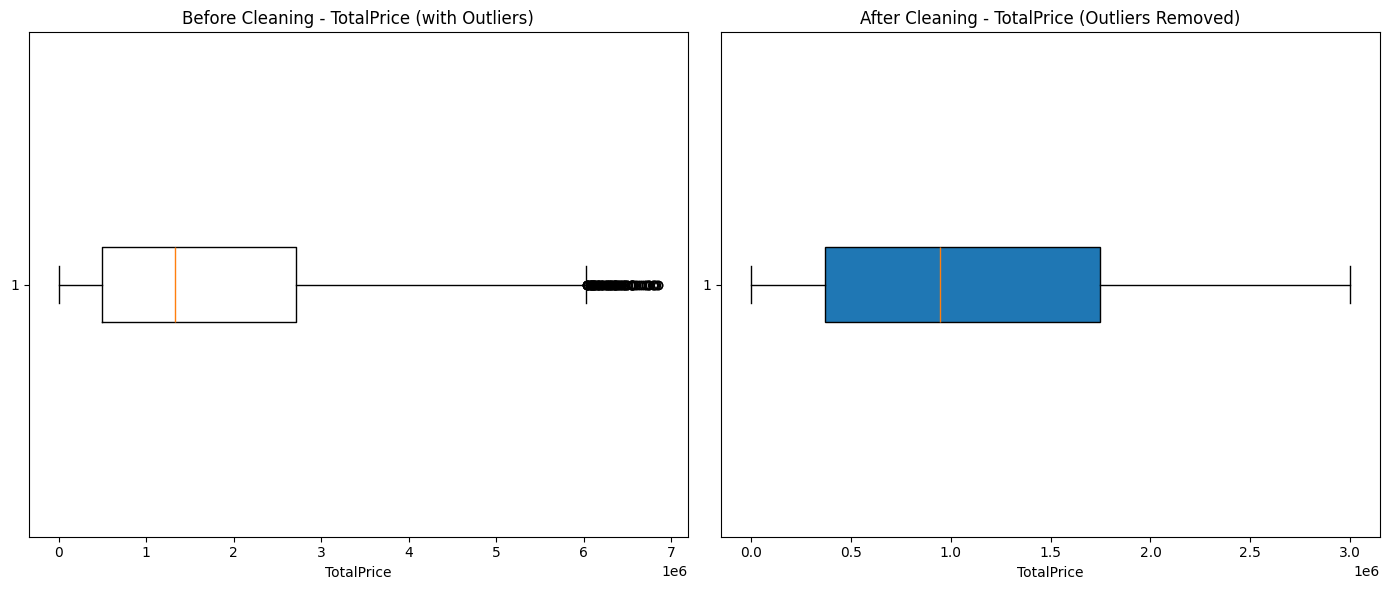

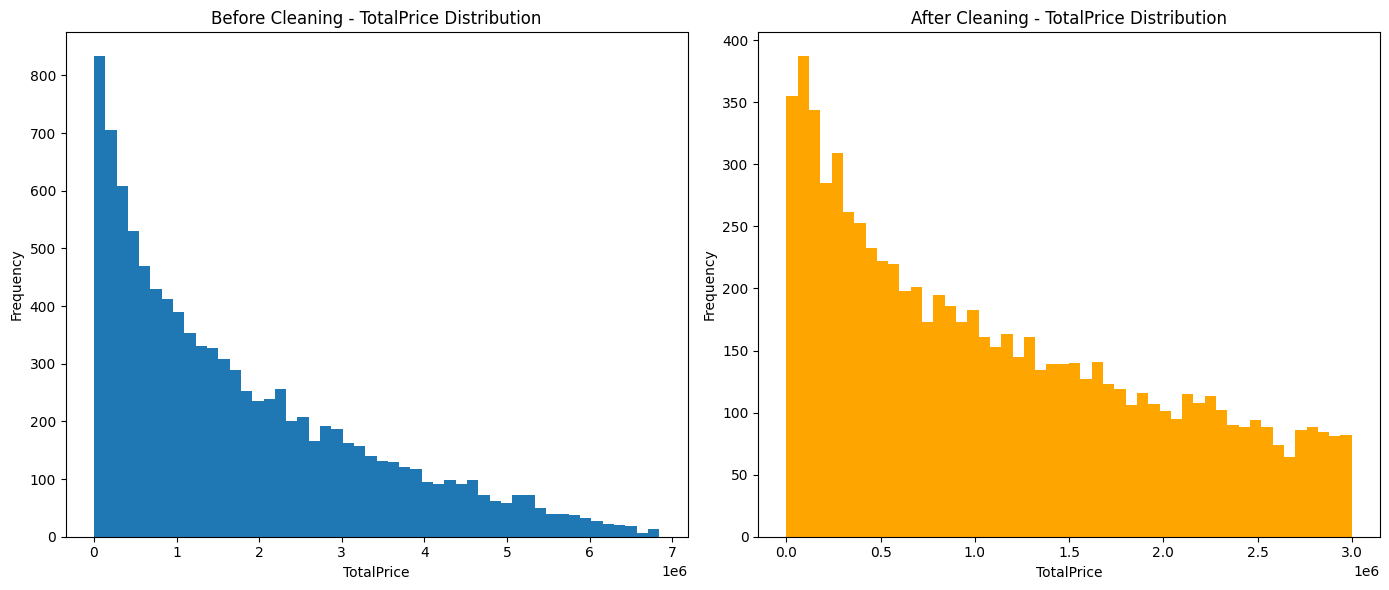

In [ ]:

import matplotlib.pyplot as plt

# إعداد حجم الشكل العام
plt.figure(figsize=(14, 6))

# ----------------------------------------------------------
# Boxplot قبل التنظيف
plt.subplot(1, 2, 1)
plt.boxplot(df_sales['TotalPrice'], vert=False)
plt.title("Before Cleaning - TotalPrice (with Outliers)")
plt.xlabel("TotalPrice")

# ----------------------------------------------------------
# Boxplot بعد التنظيف
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned_outliers['TotalPrice'], vert=False, patch_artist=True)
plt.title("After Cleaning - TotalPrice (Outliers Removed)")
plt.xlabel("TotalPrice")

plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# Histogram للمقارنة
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df_sales['TotalPrice'], bins=50)
plt.title("Before Cleaning - TotalPrice Distribution")
plt.xlabel("TotalPrice")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df_cleaned_outliers['TotalPrice'], bins=50, color='orange')
plt.title("After Cleaning - TotalPrice Distribution")
plt.xlabel("TotalPrice")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



### 🔹 Step 10: Visualization of Outlier Removal

**Objective:**
To visually demonstrate how removing extreme values (outliers) affects the distribution of the `TotalPrice` variable.

**Code Explanation:**
The code generates two types of visual comparisons:

1. **Boxplots (top figure):**

   * The left boxplot (before cleaning) shows a long right tail and several outlier points beyond 6 million, indicating the presence of extreme values.
   * The right boxplot (after cleaning) displays a much more compact distribution without outliers, confirming that the threshold-based filtering successfully removed anomalies.

2. **Histograms (bottom figure):**

   * Before cleaning, the histogram is heavily skewed to the right due to high outlier values.
   * After cleaning, the distribution becomes smoother and more symmetrical, allowing for better statistical analysis and more reliable modeling.

**Interpretation:**
These plots provide clear visual evidence that **data cleaning improved the representativeness and quality** of the dataset.
By eliminating extreme outliers, the overall data distribution is now more stable, which:

* Reduces bias in subsequent analyses,
* Enhances the interpretability of descriptive statistics, and
* Increases the accuracy of future predictive models.

**Conclusion:**
The visualization confirms that the data preprocessing step effectively identified and removed unrealistic `TotalPrice` values, leading to a **clean, well-behaved dataset** suitable for advanced analytics.

